In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
import numpy as np
from PIL import Image

In [2]:
# Create airport dataframe
Happiness_df = pd.read_csv('World _Happiness_Report_2005-2021.csv')

# Display sample data
Happiness_df.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


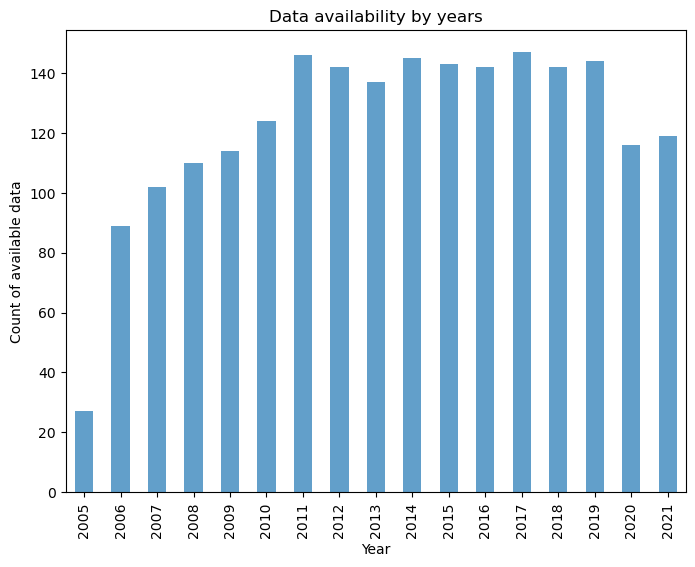

In [3]:
#Yearly summary
yearly = Happiness_df.groupby(["Year"])["Country name"]
yearly_count = yearly.count()
yearly_count.plot(kind="bar", xlabel = "Year", ylabel = "Count of available data", title = "Data availability by years", alpha = 0.7, figsize=(8, 6))
plt.savefig("output/Data_availability_by_years.jpg")
plt.show()

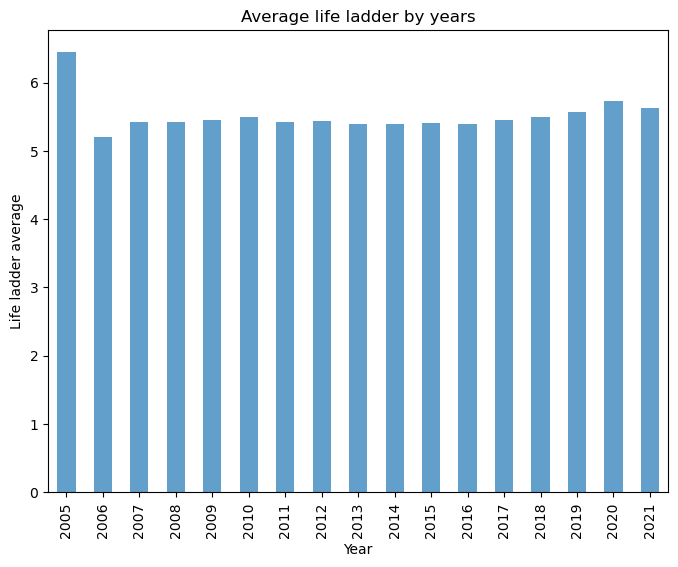

In [4]:
#yearly life ladder summary
happy = Happiness_df.groupby(["Year"])["Life Ladder"].mean()
happy.plot(kind="bar", xlabel = "Year", ylabel = "Life ladder average", title = "Average life ladder by years", alpha = 0.7, figsize=(8, 6))
plt.savefig("output/Average_life_ladder_by_years.jpg")
plt.show()

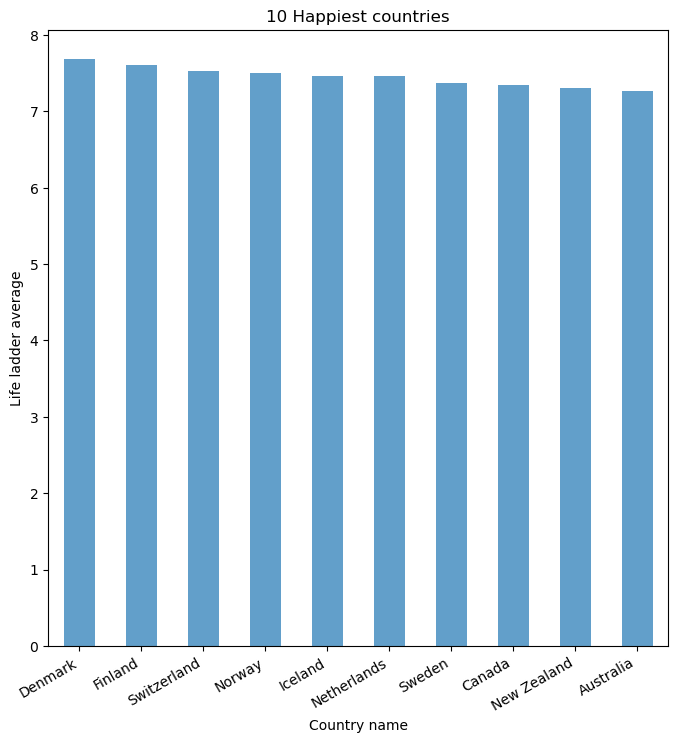

In [5]:
#10 happiest countries
happy_country = Happiness_df.groupby(["Country name"])["Life Ladder"].mean()
happy_country_sort = happy_country.sort_values(ascending=False).head(10)
happy_country_sort.plot(kind="bar", xlabel = "Country name", ylabel = "Life ladder average", title = "10 Happiest countries", alpha = 0.7, figsize=(8, 8))
plt.xticks(rotation=30, ha='right')
plt.savefig("output/10 Happiest countries.jpg")
plt.show()

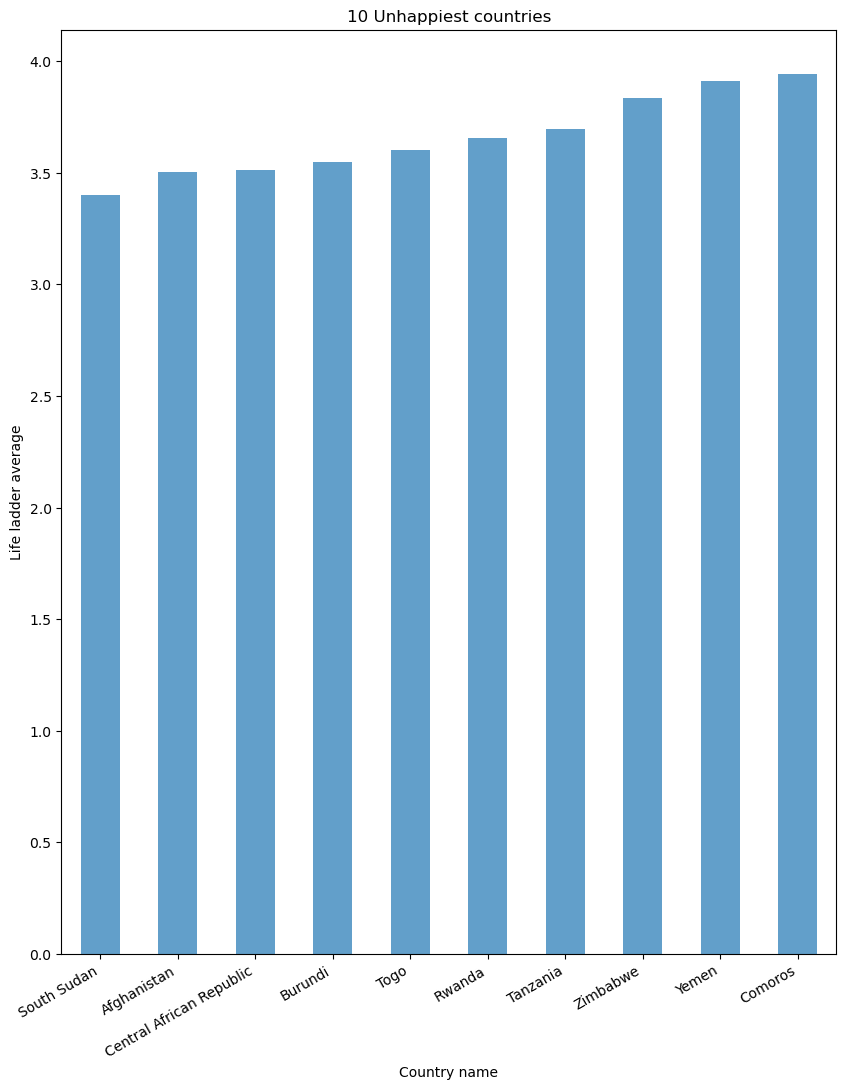

In [6]:
#10 unhappiest countries
unhappy_country = Happiness_df.groupby(["Country name"])["Life Ladder"].mean()
unhappy_country_sort = unhappy_country.sort_values().head(10)
unhappy_country_sort.plot(kind="bar", xlabel = "Country name", ylabel = "Life ladder average", title = "10 Unhappiest countries", alpha = 0.7, figsize=(10, 12))
plt.xticks(rotation=30, ha='right')
plt.savefig("output/10 Unhappiest countries.jpg")
plt.show()

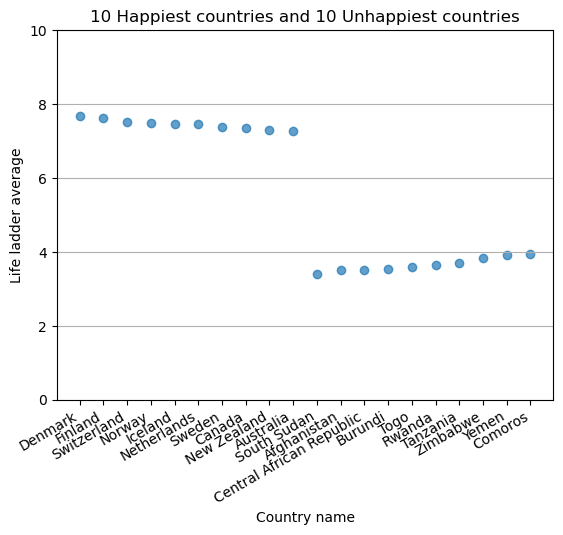

In [7]:
happy_country = Happiness_df.groupby(["Country name"])["Life Ladder"].mean()
happy_country_sort = happy_country.sort_values(ascending=False).head(10)

unhappy_country = Happiness_df.groupby(["Country name"])["Life Ladder"].mean()
unhappy_country_sort = unhappy_country.sort_values().head(10)

countries_count = pd.concat([happy_country_sort, unhappy_country_sort])


x = countries_count.index
y = countries_count.values
plt.scatter(x, y,  marker= "o", alpha = 0.7)
plt.xlabel('Country name')
plt.ylabel('Life ladder average')
plt.title('10 Happiest countries and 10 Unhappiest countries')
plt.xticks(rotation=30, ha='right')
plt.grid(axis = 'y')
plt.ylim((0,10))
plt.savefig("output/10hap_unhap.jpg",bbox_inches='tight')
plt.show()

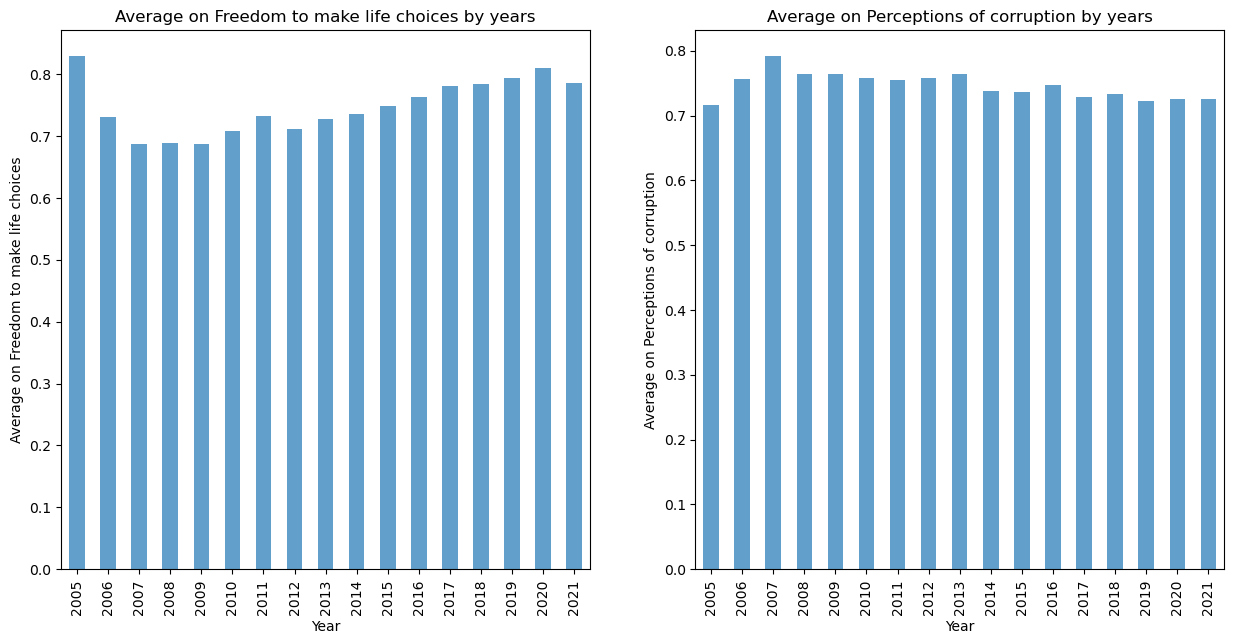

In [8]:
plt.subplots(figsize=(15, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
freedom_yearly = Happiness_df.groupby(["Year"])["Freedom to make life choices"].mean()
freedom_yearly.plot(kind="bar", xlabel = "Year", ylabel = "Average on Freedom to make life choices", title = "Average on Freedom to make life choices by years", alpha = 0.7)

plt.subplot(1, 2, 2) # index 2
corruption_yearly = Happiness_df.groupby(["Year"])["Perceptions of corruption"].mean()
corruption_yearly.plot(kind="bar", xlabel = "Year", ylabel = "Average on Perceptions of corruption", title = "Average on Perceptions of corruption by years", alpha = 0.7)

plt.savefig("output/Average_yearly.jpg")
plt.show()